In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# Loading dataset
df=pd.read_csv("C:/Users/sriva/Desktop/Ai and ml/ai_ml-tasks/alldata.csv")
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
df.shape,df.dtypes

((6964, 5),
 position        object
 company         object
 description     object
 reviews        float64
 location        object
 dtype: object)

In [4]:
# Null value analysis
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

For each position,company,description,location we have 11 null values and reviews has 1638 null values.

In [5]:
df.drop(index = df[df['position'].isnull()].index, inplace = True)
df.isnull().any()

position       False
company        False
description    False
reviews         True
location       False
dtype: bool

In [6]:
# Feature extraction
import re # Library for regular expression
df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
df['city'] = df.location.apply(lambda x: x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x: x.split(',')[1].strip())
df['location'] = df['city']+ ', ' + df['state']
df.head()

,position,company,description,reviews,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA


In [7]:
# Unique values in categorical features
for col in df.columns:
    print('{}: {} unique values'.format(col,df[col].nunique()))

position: 5242 unique values
company: 2213 unique values
description: 6708 unique values
reviews: 560 unique values
location: 92 unique values
city: 91 unique values
state: 10 unique values


In [8]:
df.position.value_counts()

Data Scientist                                           351
Senior Data Scientist                                     96
Research Analyst                                          64
Data Engineer                                             60
Machine Learning Engineer                                 56
                                                        ... 
Programmatic Specialist                                    1
Data Mining Scientist                                      1
Computational Biologist I                                  1
Machine Learning Engineers – Integrity and Anti-Abuse      1
Group Technical Program Manager, Data Warehouse            1
Name: position, Length: 5242, dtype: int64

From above it is clear there is large number of jobs available in the market for Data Scientist role.

In [9]:
df.company.value_counts()

Amazon.com                           358
Ball Aerospace                       187
Microsoft                            137
Google                               134
NYU Langone Health                    77
                                    ... 
edX                                    1
Elev8 Hire Solutions                   1
Invenia Resourcing                     1
Malin Space Science Systems, Inc.      1
Qualys                                 1
Name: company, Length: 2213, dtype: int64

In [10]:
cat_feature=df[['position','company']]
cat_feature

,position,company
0,Development Director,ALS TDI
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish
2,Data Scientist,Xpert Staffing
3,Data Analyst,Operation HOPE
4,Assistant Professor -TT - Signal Processing & ...,Emory University
...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp
6960,Scientist I,"Pharmacyclics, an Abbvie Company"
6961,Intern Scientist,Oath Inc
6962,Senior Data & Applied Scientist,Microsoft


In [11]:
cat_feature.groupby(['company']).count().sort_values('position')

,position
company,
10x Genomics,1
HeartFlow,1
Heart Rhythm Society (HRS),1
"ScaleFactor, Inc.",1
Heap,1
...,...
NYU Langone Health,77
Google,134
Microsoft,137


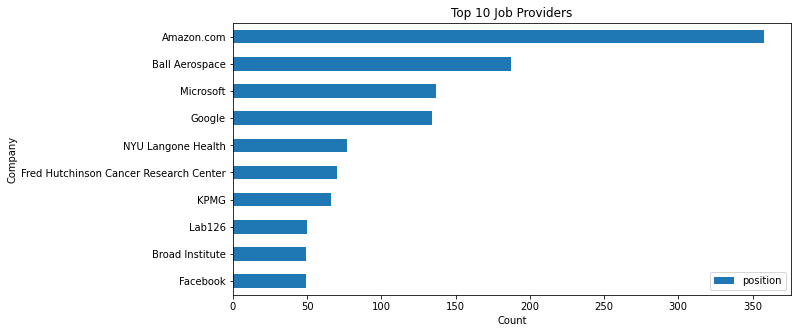

In [12]:
Major_players=cat_feature.groupby(['company']).count().sort_values('position').tail(10)
Major_players.plot(kind='barh',figsize=(10,5))
plt.title('Top 10 Job Providers')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

In [13]:
# Feature engineering
cat_feature.loc[cat_feature.position.str.contains("Data Scientist")==True,'position']= 'Data Scientist'
cat_feature.loc[cat_feature.position.str.contains("Data & Applied Scientist")==True,'position']= 'Data Scientist'
cat_feature.loc[cat_feature.position.str.contains("Analyst")==True,'position']= 'Data Analyst/Data Analytics'
cat_feature.loc[cat_feature.position.str.contains("Statistician")==True,'position']= 'Data Analyst/Data Analytics'
cat_feature.loc[cat_feature.position.str.contains("Analytics")==True,'position']= 'Data Analyst/Data Analytics'
cat_feature.loc[cat_feature.position.str.contains("Data Engineer")==True,'position']= 'Data Engineer'
cat_feature.loc[cat_feature.position.str.contains("Data Science Engineer")==True,'position']= 'Data Engineer'
cat_feature.loc[cat_feature.position.str.contains("Data Visualization")==True,'position']= 'Data Engineer'
cat_feature.loc[cat_feature.position.str.contains("Manager, Data Science")==True,'position']= 'Data Science Manager'
cat_feature.loc[cat_feature.position.str.contains("Data Science Manager")==True,'position']= 'Data Science Manager'
cat_feature.loc[cat_feature.position.str.contains("Data Manager")==True,'position']= 'Data Science Manager'
cat_feature.loc[cat_feature.position.str.contains("Data Management")==True,'position']= 'Data Science Manager'
cat_feature.loc[cat_feature.position.str.contains("Director, Data Science")==True,'position']= 'Data Science Director'
cat_feature.loc[cat_feature.position.str.contains("Director of Data Science")==True,'position']= 'Data Science Director'
cat_feature.loc[cat_feature.position.str.contains("Data Science Consultant")==True,'position']= 'Data Science Consultant'
cat_feature.loc[cat_feature.position.str.contains("Machine Learning")==True,'position']= 'Data Science ML Engineer/Scientist'
cat_feature.loc[cat_feature.position.str.contains("Data")==False,'position']= 'other'

C:\Users\sriva\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-13-6f708dc29815>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_feature.loc[cat_feature.position.str.contains("Data Scientist")==True,'position']= 'Data Scientist'
C:\Users\sriva\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

<ipython-input-13-6f708dc29815>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_feature.loc[cat_feature.position.str.contains("Machine Learning")==True,'position']= 'Data Science ML Engineer/Scientist'
C:\Users\sriva\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-13-6f708dc29815>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [14]:
cat_feature.position=cat_feature[(cat_feature.position == 'Data Scientist') | (cat_feature.position == 'Data Analyst/Data Analytics') | (cat_feature.position == 'Data Science ML Engineer/Scientist') | (cat_feature.position == 'Data Science Manager') | (cat_feature.position == 'Data Science Director') | (cat_feature.position == 'Data Science Consultant') | (cat_feature.position == 'Data Engineer')]
cat_feature.position=['Other' if x is np.nan else x for x in cat_feature.position]

C:\Users\sriva\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
# Grouping Important features
cat_feature.groupby(['position']).count().sort_values('company')

,company
position,
Data Science Consultant,6
Data Science Director,22
Data Science Manager,46
Data Engineer,189
Data Science ML Engineer/Scientist,462
Data Analyst/Data Analytics,984
Data Scientist,1253
Other,3991


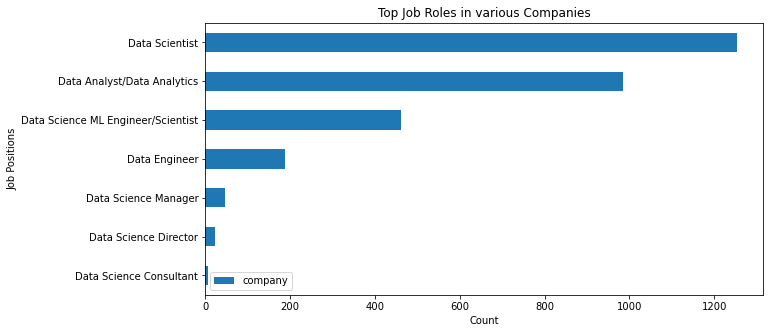

In [16]:
Job_role=cat_feature.groupby(['position']).count().sort_values('company').head(7)
Job_role.plot(kind='barh',figsize=(10,5))
plt.title('Top Job Roles in various Companies')
plt.xlabel('Count')
plt.ylabel('Job Positions')
plt.show()

Majority of job Roles in companies are Data scientist and Data Analyst.

In [17]:
city=df[['city','position']]
pos_by_city=city.groupby(['city']).count().sort_values('position').tail(10)
pos_by_city

,position
city,
Atlanta,269
Mountain View,277
Washington,340
San Diego,412
Chicago,471
San Francisco,564
Boston,629
Cambridge,694
Seattle,777


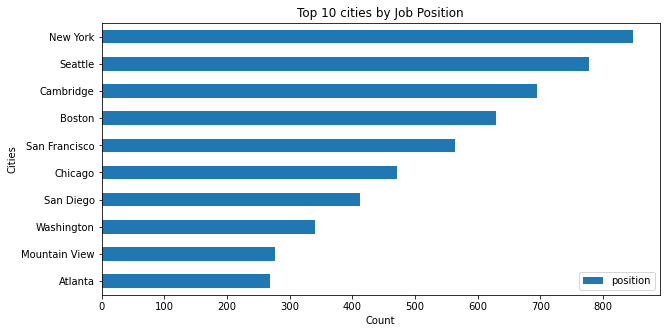

In [18]:
pos_by_city.plot(kind='barh',figsize=(10,5))
plt.title('Top 10 cities by Job Position')
plt.xlabel('Count')
plt.ylabel('Cities')
plt.show()

In [19]:
state=df[['state','position']]
pos_by_state=state.groupby(['state']).count().sort_values('position').tail(10)
pos_by_state

,position
state,
NJ,68
TX,218
CO,251
GA,269
DC,340
IL,471
NY,926
WA,935
MA,1323


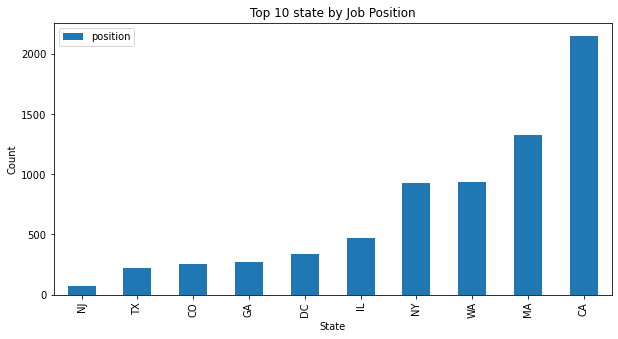

In [20]:
pos_by_state.plot(kind='bar',figsize=(10,5))
plt.title('Top 10 state by Job Position')
plt.ylabel('Count')
plt.xlabel('State')
plt.show()

<ipython-input-21-2aa2d0bb5fe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_feature['state']=df['state']
<ipython-input-21-2aa2d0bb5fe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_feature['city']=df['city']


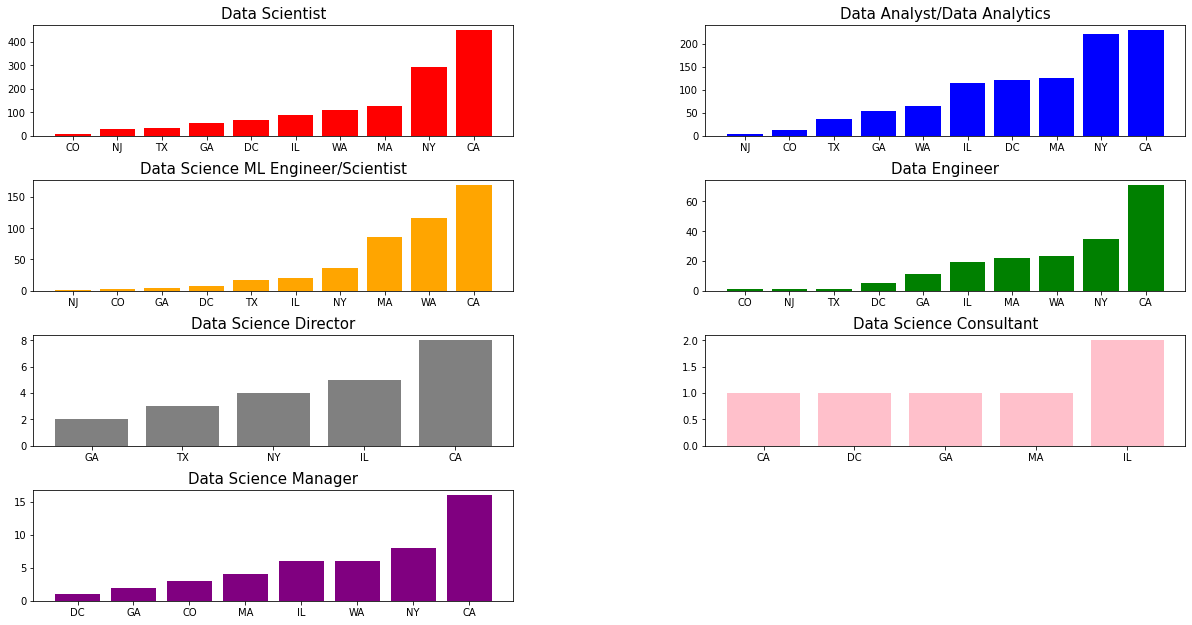

In [21]:
cat_feature['state']=df['state']
cat_feature['city']=df['city']
cat_feature = cat_feature[cat_feature['position'] != 'Other']
i = 1
color = ['Red','Blue','Orange','Green','Grey','Pink','Purple']        
fig = plt.figure(figsize=(20,10))
for position in cat_feature.position.unique():
    x = cat_feature[cat_feature['position']== str(position)].groupby(['state']).count().sort_values('company')
    plt.subplot(4, 2, i)
    i += 1
    plt.bar(x.index,x['company'], color = color[i-2])
    plt.xlabel('')
    plt.xticks(size = 10)
    plt.title(str(position), size = 15)
    # Adjusting space between subplots 
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Text Analysis ##

In [22]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [23]:
df.description.values[0][0:int(len(df.description.values[0])/2)]

"Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work in

In [24]:
# Combine the desciptions by the job tilte
cat_feature['description']=df['description']
cat_feature = cat_feature.groupby('position').agg(lambda col: ' '.join(col))
cat_feature = cat_feature[['description']]


<ipython-input-24-958d619e7aeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_feature['description']=df['description']


In [25]:
import nltk
# Removing unwanted symbols incase if exists
def clean_corpus(corpus):
    corpus = re.sub("[^A-Za-z" "]+"," ", corpus).lower()
    corpus = re.sub("[0-9" "]+"," ", corpus)
# Removing punctuation
    corpus = re.sub('\w*\d\w*', '', corpus)
    corpus = re.sub('[‘’“”…]', '', corpus)
    corpus = re.sub('\n',' ',corpus)
    return corpus


In [26]:
# Clean the text data and remove the job title 'Other'
clean = lambda x :clean_corpus(x)
df_clean = pd.DataFrame(cat_feature.description.apply(clean))
df_clean = df_clean[df_clean.index != 'Other'].copy()

In [27]:
# Lemmentize the text data to improve analysis
lemmer = WordNetLemmatizer()
df_clean['description'] = df_clean.description.apply(lambda x: word_tokenize(x))
df_clean['description'] = df_clean.description.apply(lambda x : [lemmer.lemmatize(y) for y in x])
df_clean['description'] = df_clean.description.apply(lambda x: ' '.join(x))

In [28]:
from sklearn.feature_extraction import text
extra_stopword = ['data','positions','work','team','will','experience','skill','year','skills','skilled']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

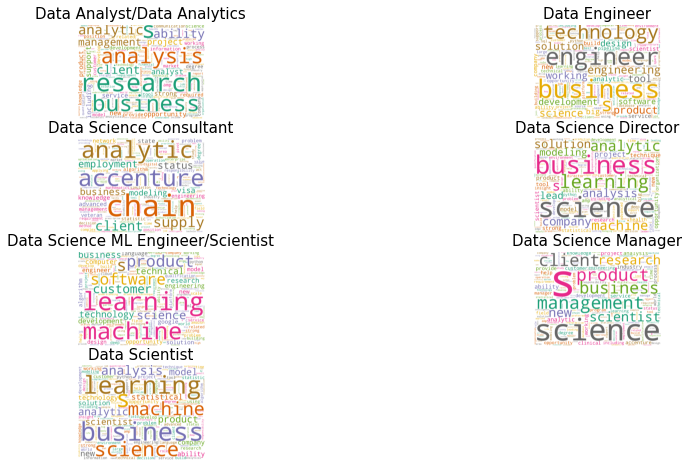

In [29]:
from wordcloud import WordCloud
# Word Cloud
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
             random_state=42, collocations = False, width=2000, height=1500)
i = 0
fig = plt.figure(figsize=(15,8))
for x in df_clean.description.index:
    wc.generate(df_clean.description[str(x)])
    
    i += 1
    fig.add_subplot(4, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(x), size = 15)
plt.show()

## Skills Required ##

In [30]:
# Loading Descriptions
text=df.description.values

In [31]:
# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [32]:
# Create a data frame with skills name and regex pattern to search with
skills = ['R','Python','Java','Hadoop','SQL','Tableau','Power BI','SaS','TensorFlow','Flask','Statistics','Visualization',
          'Algebra']

skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)Java\w*','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',"(?i)\WPower\s?BI\W?",
              "(?i)\WSAS\W?","(?i)\WTensorFlow\W?","(?i)\WFlask\W?","(?i)\WStatistics?\W?",'(?i)\WVisualization\W?',"(?i)\WAlgebra?\W?"]

skill_df =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

In [33]:
# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['percentage'] = round(skill_df['count']/len(text),2)

<ipython-input-34-025a4cd0699a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


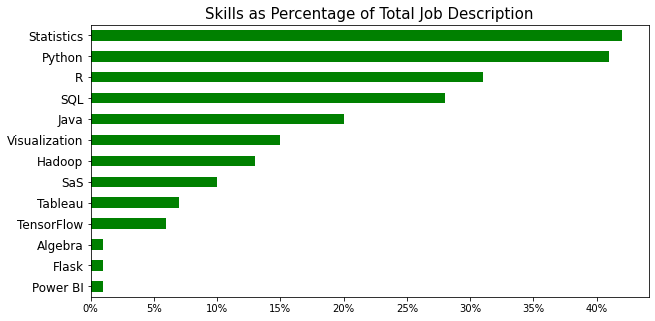

In [34]:
x = skill_df.sort_values(by = 'percentage')
ax =x['percentage'].plot(kind = "barh",figsize = (10,5),color='green')
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

Python,statistical Knowledge, R and SQL are the most desirable skills for Data Science field.